# Домашнее задание №3 по курсу «Графы и сети» (МТИИ, осень 2022)

Присылайте выполненное задание аналогично предыдущим домашним работам

In [1]:
! pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp38-cp38-linux_x86_64.whl size=17052476 sha256=ff8ade0b10c756e7ea512f7f46f80a53b482ea768b85307d2d29c2000cb4091c
  Stored in directory: /root/.cache/pip/wheels/e5/39/08/5dac86e6d7ef4c6b9f337b0913f1bf96a8b32ff45f833b067f
Successfully built pomegranate


In [2]:
import networkx as nx
import pomegranate as pg

### Задание 1
Постройте случайный граф на $n=200$ вершинах, согласно модели Эрдёша—Реньи с вероятностью появления ребра $p=\frac{1}{2}$. Напишите свой код генерации случайного графа, не пользуясь встроенным в `networkx` генератором [`gnp_random_graph`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html) и подобными. Посчитайте кликовое число в среднем по 10-20 сгенерированных графах. Насколько кликовое число далёко от теоретического среднего в $2\log_{1/p}n$?

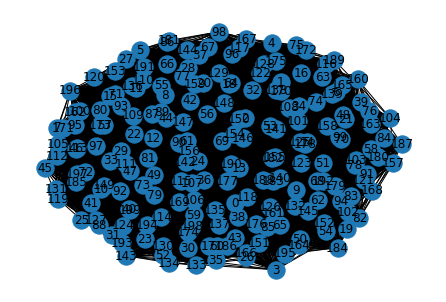

In [3]:
import networkx as nx
G= nx.erdos_renyi_graph(200,0.5, seed=2022)
nx.draw(G, with_labels=True)

In [4]:
import itertools
import random
def random_graph(n, p):
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G # Не возможно создание ребра
    if p >= 1:
        return nx.complete_graph(n, create_using=G) # Все ребра 

    for e in edges:
        if random.random() < p: # Если меньше p, создаем ребро
            G.add_edge(*e)
    return G

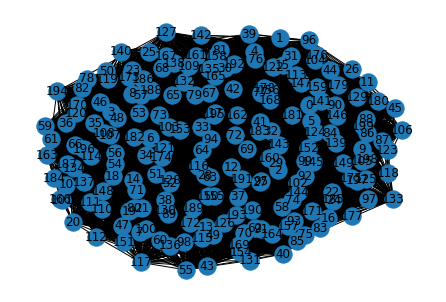

In [5]:
G = random_graph(200, 0.5)
nx.draw(G, with_labels=True)

In [6]:
max(nx.node_clique_number(G).values())

11

In [7]:
def clik_number(G):
  return max(nx.node_clique_number(G).values())

In [8]:
arr_clik_number = []
for i in range(20):
  G = random_graph(200, 0.5)
  arr_clik_number.append(clik_number(G))


In [9]:
import numpy as np
num = np.mean(arr_clik_number)

In [10]:
from math import log
import numpy as np

nplog = np.frompyfunc(log, 2, 1)

print(2 * nplog(200, 1/0.5)-num)

4.337712379549449


отличие на 4.3377

### Задание 2
Смоделируйте случайный граф в модели предпочтительного присоединения или другой отличной от Эрдёша—Реньи (согласно Вашему представлению о естественном росте, скажем, социальной сети). Опишите свою модель и приведите пример характеристик графа, которые отличаются в Вашей модели от соответствующих характеристик модели Эрдёша—Реньи.

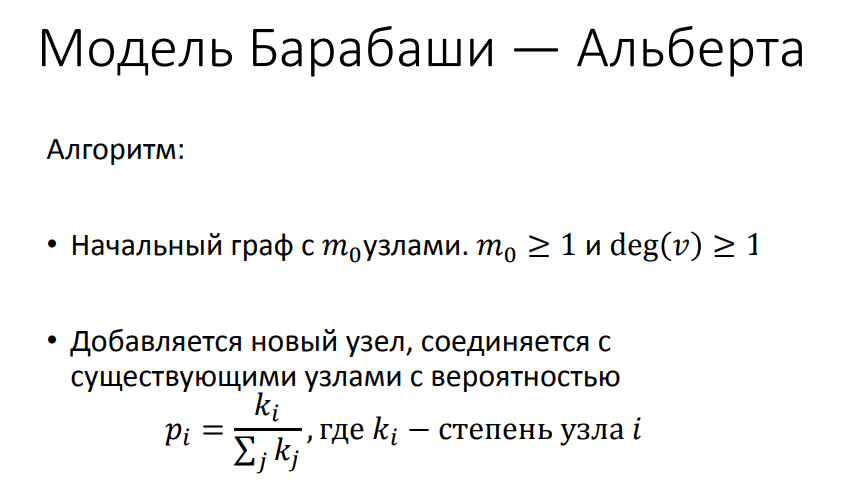

In [11]:
import pylab

In [12]:
def random_addition_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edge(0,1)
    for num_node in range(2, n):
      sum = 2 * nx.number_of_edges(G) # Сумма степеней вершин в 2 раза больше ребер
      for i in range(0, n):
        k = len(G[i])
        p = k/sum 
        if random.random() < p: # Если меньше p, создаем ребро
          G.add_edge(num_node, i)
      # nx.draw(G, with_labels=True)
      # pylab.show()
    return G

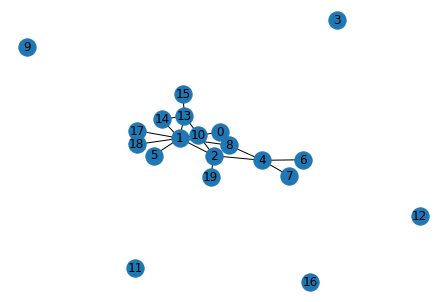

In [13]:
G = random_addition_graph(20)
nx.draw(G, with_labels=True)

In [14]:
arr_clik_number_ershena_rene = []
arr_clik_number_addition_graph = []

arr_number_edges_ershena_rene = []
arr_number_edges_addition_graph = []

arr_number_connected_components_ershena_rene = []
arr_number_connected_components_addition_graph = []
for i in range(20):
  G = random_graph(200, 0.5)
  arr_clik_number_ershena_rene.append(clik_number(G))
  arr_number_connected_components_ershena_rene.append(nx.number_connected_components(G))
  arr_number_edges_ershena_rene.append(nx.number_of_edges(G))

  G = random_addition_graph(200)
  arr_clik_number_addition_graph.append(clik_number(G))
  arr_number_connected_components_addition_graph.append(nx.number_connected_components(G))
  arr_number_edges_addition_graph.append(nx.number_of_edges(G))



In [15]:
print("модели Эрдёша—Реньи")
print(f"Кликовое число {np.mean(arr_clik_number_ershena_rene)}")
print(f"Число ребер {np.mean(arr_number_edges_ershena_rene)}")
print(f"Число компонент {np.mean(arr_number_connected_components_ershena_rene)}")

print("модели предпочтительного присоединения")
print(f"Кликовое число {np.mean(arr_clik_number_addition_graph)}")
print(f"Число ребер {np.mean(arr_number_edges_addition_graph)}")
print(f"Число компонент {np.mean(arr_number_connected_components_addition_graph)}")

модели Эрдёша—Реньи
Кликовое число 11.0
Число ребер 9936.45
Число компонент 1.0
модели предпочтительного присоединения
Кликовое число 3.45
Число ребер 194.05
Число компонент 74.65


Ваши комментарии

### Задание 3
Смоделируйте с помощью скрытой марковской модели следующую ситуацию. Гражданин Рассеянный в зависимости (почти) от погоды надевает либо футболку, либо плащ, либо тулуп. Когда жарко, он равновероятно надевает каждый из трёх видов одежды. Когда холодно, он не надевает плащ, а равновероятно надевает футболку либо тулуп. Когда температура средняя, он надевает исключительно тулуп либо плащ. Температура никогда не меняется резко (жаркая погода сменяется на холодную, и наоборот, — только через среднее состояние); при этом каждое состояние погоды равновероятно может остаться без изменений либо смениться на любое другое допустимое. На протяжении недели Рассеянный постил свои фото в Instagram в следующей одежде:
- пн: тулуп,
- вт: тулуп,
- ср: плащ,
- чт: футболка,
- пт: плащ,
- сб: плащ,
- вс: футболка.

Какая наиболее вероятная погода стояла на улице Бассейной в каждый из этих дней?

In [16]:
! pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from pomegranate import *
hot = DiscreteDistribution({'тулуп' : 1/3, 'плащ' : 1/3, 'футболка' : 1/3})
cold = DiscreteDistribution({'тулуп' : 0.5, 'футболка' : 0.5})
medium = DiscreteDistribution({'тулуп' : 0.5, 'плащ' : 0.5})

s1 = State(hot, name="hot")
s2 = State(cold, name="cold")
s3 = State(medium, name="medium")

model = HiddenMarkovModel('example')
model.add_states([s1, s2, s3])
model.add_transition(model.start, s1, 1/3)
model.add_transition(model.start, s2, 1/3)
model.add_transition(model.start, s3, 1/3)

model.add_transition(s1, s1, 0.50)
model.add_transition(s1, s2, 0.50)

model.add_transition(s2, s1, 1/3)
model.add_transition(s2, s2, 1/3)
model.add_transition(s2, s3, 1/3)

model.add_transition(s3, s2, 0.50)
model.add_transition(s3, s3, 0.50)
model.bake()

print(model.log_probability(['тулуп', 'тулуп', 'плащ', 'футболка', 'плащ', 'плащ', 'футболка']))

-8.247727254097672


In [18]:
print(", ".join(state.name for i, state in model.viterbi(['тулуп', 'тулуп', 'плащ', 'футболка', 'плащ', 'плащ', 'футболка'])[1]))

example-start, medium, medium, medium, cold, medium, medium, cold


### Задание 4
С использованием pomegranate или другой (согласованной предварительно) библиотеки смоделируйте следующую ситуацию. 

Виктор работает в фирме Macrohard вместе со своими коллегами Кейт и Джоном. В городе, где находится офис Macrohard, с вероятностью 0.1 может произойти землетрясение. В этом случае по радио гарантированно объявляют об угрозе землетрясения, а в зданиях с вероятностью 0.4 от сейсмического толчка срабатывает сигнализация. Кроме того, с вероятностью 0.02 в здании может произойти ограбление и в этом случае сигнализация сработает наверняка. Джон и Виктор не слушают радио во время обеденного перерыва, а Кейт включает радио с вероятностью 0.5. Если происходит что-то необычное, Кейт всегда звонит Виктору, а Джон звонит Виктору с вероятностью 0.3. Джон и Кейт обычно обедают в офисе, а Виктор перекусывает в парке. 

Случилось следующее:  во время обеда Кейт позвонила Виктору и сказала, что, вероятно, в городе землетрясение. К сожалению, ровно в этот момент сел аккумулятор в её смартфоне, и Виктор так и не понял, Кейт позвонила ему потому, что услышала о землетрясении по радио, или потому, что Кейт осталась обедать в офисе и услышала сигнализацию. Джон Виктору не позвонил. Какова (апостериорная) вероятность того, что в городе землетрясение?

In [19]:
quake = DiscreteDistribution({
    'quake': 0.1,
    'no quake': 0.9
})

robbery = DiscreteDistribution({
    'robbery': 0.02,
    'no robbery': 0.98
})

radioes = DiscreteDistribution({
    "radio": 0.5,
    "no radio": 0.5
})


radioes_kate = DiscreteDistribution({
    "radio": 0.5,
    "no radio": 0.5
})

radioes_john = DiscreteDistribution({
    "radio": 0,
    "no radio": 1
})

In [20]:
signalization = []
for rob in robbery.keys():
  for quak in quake.keys():
    for radio in radioes.keys():
      for key in ['signalization', 'no signalization']:
        prob = 0
        if key == 'signalization':
          if rob == 'robbery':
            prob = 1
          elif quak == 'quake' and radio == 'radio':
            prob = 1
          elif quak == 'quake' and radio == 'no radio':
            prob = 0.4
        else:
          if rob == 'no robbery':
            if quak == 'quake'  and radio == 'no radio':
              prob = 0.6
            elif quak == 'quake'  and radio == 'radio':
              prob = 0
            else:
              prob = 1
        signalization.append([rob, quak, radio, key, prob])

signalization

[['robbery', 'quake', 'radio', 'signalization', 1],
 ['robbery', 'quake', 'radio', 'no signalization', 0],
 ['robbery', 'quake', 'no radio', 'signalization', 1],
 ['robbery', 'quake', 'no radio', 'no signalization', 0],
 ['robbery', 'no quake', 'radio', 'signalization', 1],
 ['robbery', 'no quake', 'radio', 'no signalization', 0],
 ['robbery', 'no quake', 'no radio', 'signalization', 1],
 ['robbery', 'no quake', 'no radio', 'no signalization', 0],
 ['no robbery', 'quake', 'radio', 'signalization', 1],
 ['no robbery', 'quake', 'radio', 'no signalization', 0],
 ['no robbery', 'quake', 'no radio', 'signalization', 0.4],
 ['no robbery', 'quake', 'no radio', 'no signalization', 0.6],
 ['no robbery', 'no quake', 'radio', 'signalization', 0],
 ['no robbery', 'no quake', 'radio', 'no signalization', 1],
 ['no robbery', 'no quake', 'no radio', 'signalization', 0],
 ['no robbery', 'no quake', 'no radio', 'no signalization', 1]]

In [21]:
signalization_kate = ConditionalProbabilityTable(
       signalization, [robbery, quake, radioes_kate]) 

signalization_john = ConditionalProbabilityTable(
       signalization, [robbery, quake, radioes_john])  

In [31]:
call_kate = ConditionalProbabilityTable([["signalization", "call", 1.],
                                  ["signalization", "no call", 0],
                                  ["no signalization", "call", 0],
                                  ["no signalization", "no call", 1.]], [signalization_kate])

call_john = ConditionalProbabilityTable([["signalization", "call", 0.3],
                                  ["signalization", "no call", 0.7],
                                  ["no signalization", "call", 0],
                                  ["no signalization", "no call", 1]], [signalization_john])


In [32]:
s1 = State(robbery, name="robbery")
s2 = State(quake, name="quake")
s3_kate = State(radioes_kate, name="radio_kate")
s4_kate = State(signalization_kate, name="signalization_kate")

s3_john = State(radioes_john, name="radio_john")
s4_john = State(signalization_john, name="signalization_john")

s5_kate = State(call_kate, name="call_kate")
s5_john = State(call_john, name="call_john")

In [42]:
# Create the Bayesian network object with a useful name
model = BayesianNetwork("Monty Hall Problem")

# Add the three states to the network 
model.add_states(s1, s2, s3_kate, s4_kate, s3_john, s4_john, s5_john, s5_kate)
model.add_edge(s1, s4_kate)
model.add_edge(s2, s4_kate)
model.add_edge(s1, s4_john)
model.add_edge(s2, s4_john)
model.add_edge(s3_kate, s4_kate)
model.add_edge(s3_john, s4_john)
model.add_edge(s4_john, s5_john)
model.add_edge(s4_kate, s5_kate)
model.bake()

In [49]:
props = model.predict_proba([{
    "call_kate":"call",
    "call_john":"no call"
    }])

In [50]:
props[0][1]

{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "quake" : 0.818829603834001,
            "no quake" : 0.181170396165999
        }
    ],
    "frozen" : false
}

In [53]:
props[0][0]

{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "robbery" : 0.19932697952783335,
            "no robbery" : 0.8006730204721666
        }
    ],
    "frozen" : false
}

Ответ 81,88% - вероятность землятрясения

19,93%  - вероятность кражи